### 基于买卖单数据的因子

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
tqdm.pandas()
import statsmodels.api as sm
import multiprocessing
from multiprocessing import Pool

/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
data23 = pd.read_hdf('/mnt/datadisk2/aglv/aglv/lab_aglv/data21_23.h5')

In [4]:
data23

Open  Close   High    Low  LastVolume  \
Date     InstrumentID EndTime                                           
20210104 SZ000001     09:31    19.10  18.90  19.10  18.82   3155510.0   
                      09:32    18.90  18.80  18.90  18.78   1791334.0   
                      09:33    18.80  18.84  18.85  18.81   1656900.0   
                      09:34    18.84  18.67  18.82  18.65   2376914.0   
                      09:35    18.67  18.57  18.65  18.50   2616000.0   
...                              ...    ...    ...    ...         ...   
20231012 SH689009     14:56    33.94  33.88  33.94  33.88     23275.0   
                      14:57    33.92  33.89  33.92  33.86      9297.0   
                      14:58    33.89  33.89  33.89  33.89         0.0   
                      14:59    33.89  33.89  33.89  33.89         0.0   
                      15:00    33.77  33.77  33.77  33.77     62011.0   

                               LastTurnOver  
Date     InstrumentID EndTime                
20210104 SZ000001     09:31     59855405.18  
                      09:32     33745895.32  
                      09:33     31190135.00  
                      09:34     44535547.45  
                      09:35     48631903.70  
...                                     ...  
20231012 SH689009     14:56       789311.00  
                      14:57       315093.00  
                      14:58            0.00  
                      14:59            0.00  
                      15:00      2094111.00  

[751830321 rows x 6 columns]

In [2]:
cd /mnt/datadisk2/aglv/aglv/lab_aglv/forintern/

/mnt/datadisk2/aglv/aglv/lab_aglv/forintern


In [3]:
from DataDaily import DataDaily
datadaily = DataDaily()

load ./data_daily.h5...


In [4]:
clo_day = datadaily.adjclose.loc[20210101:20231231]
ret20 = clo_day / clo_day.shift(20) - 1
ret = clo_day.pct_change()
vol = datadaily.volume.loc[20210101:20231231]

In [12]:
factor_path = '/mnt/datadisk2/aglv/aglv/aglv_factor/fa_transform/'

In [6]:
r_win = 5

buy_l_order = datadaily.buy_value_large_order.loc[20210101:20231231]
sell_l_order = datadaily.sell_value_large_order.loc[20210101:20231231]
buy_xl_order = datadaily.buy_value_exlarge_order.loc[20210101:20231231]
sell_xl_order = datadaily.sell_value_exlarge_order.loc[20210101:20231231]

buy_s_order = datadaily.buy_value_small_order.loc[20210101:20231231]
sell_s_order = datadaily.sell_value_small_order.loc[20210101:20231231]

buy_l_order_act = datadaily.buy_value_large_order_act.loc[20210101:20231231]
sell_l_order_act = datadaily.sell_value_large_order_act.loc[20210101:20231231]
buy_xl_order_act = datadaily.buy_value_exlarge_order_act.loc[20210101:20231231]
sell_xl_order_act = datadaily.sell_value_exlarge_order_act.loc[20210101:20231231]

buy_l_order_demean = buy_l_order / buy_l_order.rolling(r_win).mean()
sell_l_order_demean = sell_l_order / sell_l_order.rolling(r_win).mean()
buy_xl_order_demean = buy_xl_order / buy_xl_order.rolling(r_win).mean()
sell_xl_order_demean = sell_xl_order / sell_xl_order.rolling(r_win).mean()

buy_l_order_act_demean = buy_l_order_act / buy_l_order_act.rolling(r_win).mean()
sell_l_order_act_demean = sell_l_order_act / sell_l_order_act.rolling(r_win).mean()
buy_xl_order_act_demean = buy_xl_order_act / buy_xl_order_act.rolling(r_win).mean()
sell_xl_order_act_demean = sell_xl_order_act / sell_xl_order_act.rolling(r_win).mean()

buy_l_s_ratio = buy_l_order / buy_s_order
sell_l_s_ratio = sell_l_order / sell_s_order

In [10]:
vol['SH600000']

date
20210104    629069.39
20210105    538591.77
20210106    618813.21
20210107    570904.42
20210108    558014.55
              ...    
20231225    129043.49
20231226    119345.42
20231227    184227.04
20231228    348027.33
20231229    338014.29
Name: SH600000, Length: 727, dtype: float64

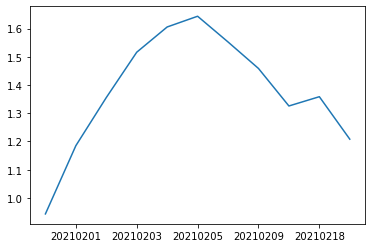

In [43]:
eg = buy_l_order['SH600000'].iloc[:30]
vol_eg = vol['SH600000']
clo_eg = clo_day['SH600000'].iloc[:30]
clo_eg.index = [str(i) for i in clo_eg.index]
vol_eg.index = [str(i) for i in vol_eg.index]
# eg = eg / vol_eg
eg.index = [str(i) for i in eg.index]

s_w, l_w = 5, 20
eg_s_ml = eg.rolling(s_w).mean()
eg_l_ml = eg.rolling(l_w).mean()
eg = eg_s_ml / eg_l_ml
eg.plot()

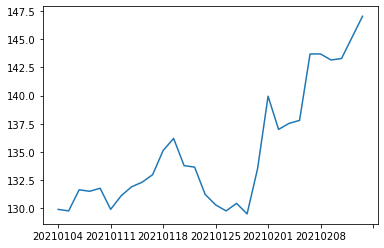

In [41]:
clo_eg.plot()
plt.show()

In [26]:
# b_s_l_ratio.to_csv(factor_path + 'b_s_l_ratio.csv')

In [15]:
for i in [5, 10, 20]:
    b_r_max_std_ratio = buy_l_s_ratio / buy_l_s_ratio.rolling(i).std()
    b_r_max_std_ratio.to_csv(factor_path + f'buy_l_s_ratio_r{i}_std_ratio.csv')

In [35]:
b_b_act_l_ratio = buy_l_order / buy_l_order_act
b_b_act_l_ratio.rolling(10).mean().to_csv(factor_path + 'b_b_act_l_ratio_r10_mean.csv')

In [40]:
buy_l_s_ratio.to_csv(factor_path + 'buy_l_s_ratio.csv')

In [12]:
buy_l_order_ret20_ratio = buy_l_order / ret20
buy_l_order_ret20_ratio.to_csv(factor_path + 'buy_l_order_ret20_ratio.csv')

In [13]:
buy_l_order_ret20_ratio_r10std_ratio = buy_l_order_ret20_ratio / buy_l_order_ret20_ratio.rolling(10).std()
buy_l_order_ret20_ratio_r10std_ratio.to_csv(factor_path + 'buy_l_order_ret20_ratio_r10sd_ratio.csv')

In [18]:
buy_l_order_corr_ret = buy_l_order_demean.rolling(20).corr(ret)
buy_l_order_corr_ret.to_csv(factor_path + 'buy_l_order_corr_ret.csv')

In [29]:
def neutralize_stock(factor_stock):
    factor_stock = factor_stock.fillna(0)
    stock_name = factor_stock.name
    # X = pd.DataFrame({'ret20':ret20.loc[factor_stock.index, stock_name], 'vol20':vol20.loc[factor_stock.index, stock_name]})
    X = ret20.loc[factor_stock.index, stock_name]
    X = X.fillna(0)
    X = sm.add_constant(X)
    model = sm.OLS(factor_stock, X)
    res = model.fit()
    return res.resid

In [39]:
# neu_buy_l_order_demean = buy_l_order_demean.loc[ret20.index, ret20.columns].rolling(20).progress_apply(neutralize_stock)
# neu_buy_l_order_demean

In [43]:
buy_l_order_act_demean.rolling(20).corr(ret).mean(axis=1)

date
20210104         NaN
20210105         NaN
20210106         NaN
20210107         NaN
20210108         NaN
              ...   
20231225    0.327817
20231226    0.309683
20231227    0.306316
20231228    0.370856
20231229    0.397569
Length: 727, dtype: float64

In [44]:
79 / 218

0.3623853211009174

In [47]:
exce_buy_l_order = buy_l_order - buy_l_order.shift(1) * (vol / vol.shift(1))

In [48]:
exce_buy_l_order.to_csv(factor_path + 'exce_buy_l_order.csv')

In [49]:
exce_buy_l_order_r10_std_ratio = exce_buy_l_order / exce_buy_l_order.rolling(10).std()
exce_buy_l_order_r10_std_ratio.to_csv(factor_path + 'exce_buy_l_order_r10_std_ratio.csv')

In [50]:
exce_buy_l_order_demean = exce_buy_l_order / exce_buy_l_order.rolling(20).mean()

In [51]:
exce_buy_l_order_demean.to_csv(factor_path + 'exce_buy_l_order_demean.csv')

In [52]:
exce_buy_l_order_demean_r10_std_ratio = exce_buy_l_order_demean / exce_buy_l_order_demean.rolling(10).std()
exce_buy_l_order_demean_r10_std_ratio.to_csv(factor_path + 'exce_buy_l_order_demean_r10_std_ratio.csv')

In [53]:
exce_buy_l_order_per = exce_buy_l_order / vol
exce_buy_l_order_per.to_csv(factor_path + 'exce_buy_l_order_per.csv')

In [54]:
exce_buy_s_order = buy_s_order - buy_s_order.shift(1) * (vol / vol.shift(1))

In [55]:
exce_buy_s_order.to_csv(factor_path + 'exce_buy_s_order.csv')

In [60]:
exce_ret_buy_l_order = buy_l_order - buy_l_order.shift(1) * (vol / vol.shift(1))

In [62]:
exce_ret_buy_l_order_demean = exce_ret_buy_l_order / exce_ret_buy_l_order.rolling(10).mean()
exce_ret_buy_l_order.to_csv(factor_path + 'exce_ret_buy_l_order_demean.csv')

In [76]:
exce_buy_l_order_demean.mean(axis=1).isna().sum()

20

In [87]:
exce_ret_buy_l_order_demean

InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301589,SZ301591,SZ301596,SZ301600,SZ301603,SZ301606,SZ301607,SZ301608,SZ301611,SZ301618
date,,,,,,,,,,,,,,,,,,,,,
20210104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20231225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
def _f(x:pd.Series):
    return np.power((x - x.mean()), 2)

In [93]:
cd_exce_ret_buy_l_order_demean = exce_ret_buy_l_order_demean.apply(_f, axis=1)

In [82]:
exce_ret_buy_l_order_demean

InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301589,SZ301591,SZ301596,SZ301600,SZ301603,SZ301606,SZ301607,SZ301608,SZ301611,SZ301618
date,,,,,,,,,,,,,,,,,,,,,
20210104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20231225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
cd_exce_ret_buy_l_order_demean.to_csv(factor_path + 'cd_exce_ret_buy_l_order_demean.csv')

In [94]:
cd_exce_ret_buy_l_order_demean.isna().sum(axis=1)

date
20210104    5644
20210105    5644
20210106    5644
20210107    5644
20210108    5644
            ... 
20231225     578
20231226     580
20231227     579
20231228     581
20231229     581
Length: 727, dtype: int64

In [119]:
buy_l_order_act_demean.to_csv(factor_path + 'buy_l_order_act_demean.csv')

In [120]:
neu_ret_buy_l_order_act_demean = buy_l_order_act_demean - buy_l_order_act_demean.shift(1) * (clo_day / clo_day.shift(1))

In [121]:
neu_ret_buy_l_order_act_demean.to_csv(factor_path + 'neu_ret_buy_l_order_act_demean.csv')

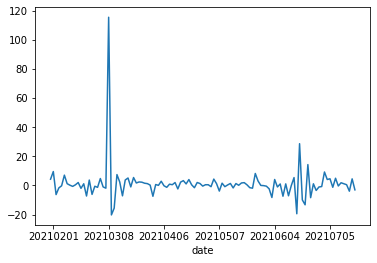

In [56]:
s_name = 'SH600000'
eg = buy_l_order[s_name].iloc[:130]
# eg_small = buy_s_order[s_name].iloc[:130]
# eg_small.index = [str(i) for i in eg_small.index]
eg = buy_xl_order[s_name].iloc[:130] - sell_xl_order[s_name].iloc[:130]
eg.index = [str(i) for i in eg.index]
# eg = eg - eg_small
eg.index.names = ['date']
eg_vol = vol[s_name].iloc[:130]
eg_vol.index = [str(i) for i in eg_vol.index]

# eg = eg / eg_vol
# eg = eg - eg.shift(1) * (eg_vol / eg_vol.shift(1))
# s_w, l_w = 5, 20
# eg_s_ml = eg.rolling(s_w).mean()
# eg_l_ml = eg.rolling(l_w).mean()
# eg = eg_s_ml / eg_l_ml
eg = eg / eg.rolling(20).mean()

eg.plot()

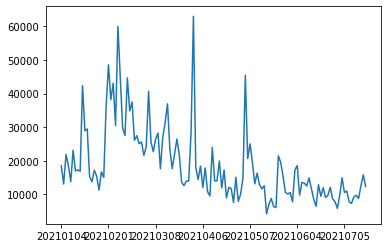

In [57]:
eg2 = buy_l_order[s_name].iloc[:130]
eg2.index = [str(i) for i in eg2.index]
eg2.plot()

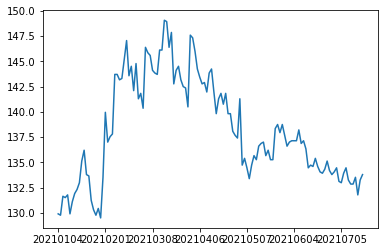

In [50]:
eg_clo = clo_day[s_name].iloc[:130]
eg_clo.index = [str(i) for i in eg_clo.index]
eg_clo.plot()

In [58]:
for i in range(10):
    print(eg.shift(i).corr(eg_clo), eg.shift(i).corr(eg_clo.pct_change()))

0.07890921811375341 -0.004214156350343586
0.05163037885740129 -0.05666484142695589
0.057830993648820314 0.0073334881830051995
0.0649289731615953 0.027166438817525444
0.085384541457651 0.05358381744306805
0.1478452862171258 0.15061101439683625
0.1363405639174126 -0.033281347034503896
0.10301669214241227 -0.07977657537400182
0.15427238825361186 0.1194694966925742
0.0615435170922218 -0.2249605880974124


In [124]:
buy_l_minu_s_order_vol_ratio = (buy_l_order - buy_s_order) / vol
buy_l_minu_s_order_vol_ratio.to_csv(factor_path + 'buy_l_minu_s_order_vol_ratio.csv')

In [167]:
buy_l_order_demean_mul_r10_std = buy_l_order_demean / buy_l_order_demean.rolling(10).std()
buy_l_order_demean_mul_r10_std.to_csv(factor_path + 'buy_l_order_demean_devid_r10_std.csv')

In [54]:
for i in [3, 5, 10]:
    buy_l_act_strength = buy_l_order_act.rolling(i).mean() / buy_l_order_act.rolling(i).std()
    buy_l_act_strength.to_csv(factor_path + f'buy_l_act_r{str(i)}_mean_std_ratio.csv')

In [59]:
data23

Open  Close   High    Low  LastVolume  \
Date     InstrumentID EndTime                                           
20210104 SZ000001     09:31    19.10  18.90  19.10  18.82   3155510.0   
                      09:32    18.90  18.80  18.90  18.78   1791334.0   
                      09:33    18.80  18.84  18.85  18.81   1656900.0   
                      09:34    18.84  18.67  18.82  18.65   2376914.0   
                      09:35    18.67  18.57  18.65  18.50   2616000.0   
...                              ...    ...    ...    ...         ...   
20231012 SH689009     14:56    33.94  33.88  33.94  33.88     23275.0   
                      14:57    33.92  33.89  33.92  33.86      9297.0   
                      14:58    33.89  33.89  33.89  33.89         0.0   
                      14:59    33.89  33.89  33.89  33.89         0.0   
                      15:00    33.77  33.77  33.77  33.77     62011.0   

                               LastTurnOver  
Date     InstrumentID EndTime                
20210104 SZ000001     09:31     59855405.18  
                      09:32     33745895.32  
                      09:33     31190135.00  
                      09:34     44535547.45  
                      09:35     48631903.70  
...                                     ...  
20231012 SH689009     14:56       789311.00  
                      14:57       315093.00  
                      14:58            0.00  
                      14:59            0.00  
                      15:00      2094111.00  

[751830321 rows x 6 columns]

In [11]:
vol

InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301596,SZ301600,SZ301603,SZ301606,SZ301607,SZ301608,SZ301611,SZ301613,SZ301618,SZ301626
date,,,,,,,,,,,,,,,,,,,,,
20210104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20231225,47661.87,11965.78,212844.40,23738.55,121828.59,112483.03,36180.95,58718.85,12204.64,24711.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231226,48360.27,16929.40,248654.85,37546.89,132041.25,83615.61,31717.76,53018.28,28952.28,28253.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231227,32642.28,17226.90,264381.35,80505.36,102456.60,74829.40,23802.09,36153.04,23582.27,21628.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
path2 = '/mnt/datadisk2/aglv/aglv/aglv_factor/fa_transform/'
exce_buy_l_per = buy_l_order / buy_l_order.shift(1) - vol / vol.shift(1)
exce_buy_l_per.to_csv(path2 + 'exce_buy_l_per.csv')

In [7]:
pure_buy_l = buy_l_order - sell_l_order

In [9]:
pure_buy_l['SH600000']

date
20210104    -761.7365
20210105    -893.0433
20210106    5997.5958
20210107    -330.2173
20210108   -2311.5376
              ...    
20231225    -448.6614
20231226     538.8663
20231227    -852.5214
20231228      86.2226
20231229    1386.3882
Name: SH600000, Length: 727, dtype: float64

In [13]:
pure_buy_l.to_csv(factor_path + 'pure_buy_l.csv')

In [14]:
pure_buy_l_per = pure_buy_l / pure_buy_l.shift(-1)
pure_buy_l_per.to_csv(factor_path + 'pure_buy_l_per.csv')